# GRIP - The Sparks Foundation
# Data Science & Business Analytics Intern - Oct-2021

# Task 1: Prediction using Supervised ML
# Author: PARIGELA NAVEEN KUMAR
# Dataset can be used downloaded from this link:- http://bit.ly/w-data
# Problem Statements
# Predict the percentage of an student based on the no. of study hours.
# What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


## importing data


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## Reading the imported data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(data)
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Basic EDA

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.shape

(25, 2)

In [9]:
data.size

50

## Checking for null values

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Heatmap for null values

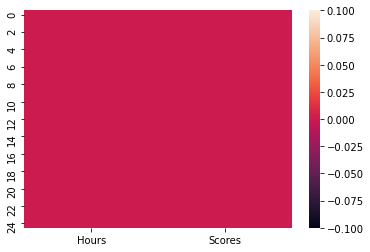

In [11]:
sb.heatmap(data.isnull())

## checking for correlation

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


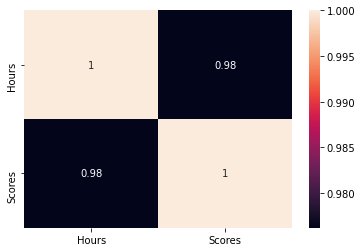

In [13]:
sb.heatmap(data.corr(), annot = True)

In [14]:
data.nunique()

Hours     23
Scores    23
dtype: int64

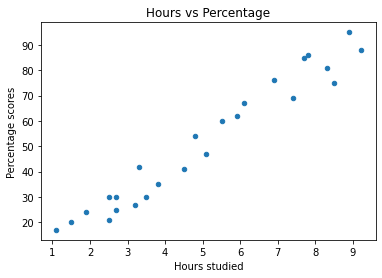

In [15]:
data.plot(kind="scatter",x="Hours",y="Scores");
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scores")
plt.show()

## Preparing the Data

In [16]:
X=df.iloc[:,:-1].values 
Y=df.iloc[:,1].values

In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Splitting The Data Into Training and Testing Data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [21]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [22]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [23]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

## Training the Algorithm 

In [24]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, Y_train) 

LinearRegression()

## Plotting The Regression Line

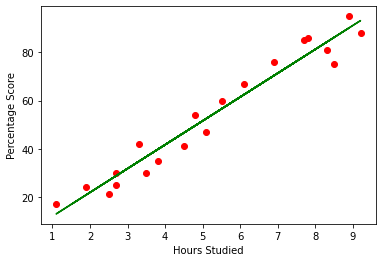

In [25]:
line=model.coef_*X +model.intercept_

#Plotting for the training data
plt.scatter(X_train,Y_train,color='red')
plt.plot(X,line,color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Making Prediction

In [26]:
Y_predict=model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, confusion_matrix

In [28]:
r2_score(Y_test, Y_predict)

0.9454906892105354

In [29]:
df1= pd.DataFrame({"Actaual Y": Y_test, "Predicted Y":Y_predict})
df1.head()

,Actaual Y,Predicted Y
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting score if a student studies 9.25 hours/day

In [30]:
own_Y_pred = model.predict([[9.25]])
print(own_Y_pred[0])

93.69173248737539


## Mean Absolute Error

In [31]:
from sklearn import metrics
metrics.mean_absolute_error(Y_test, Y_predict)

4.183859899002982

# Conclusion:When a student studies for 9.25 hours per day,the prediction score will be 93%

# THANK YOU!!!

 